<a href="https://colab.research.google.com/github/Nyota-Lab/movies/blob/Modelamiento-y-Evaluacion/Modelamiento_y_Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#empezamos importando las librerias
import numpy as np
import pandas as pd

In [0]:
#cargamos nuestro dataframe
x = pd.read_csv(r'C:\Users\willi\Documents\Programacion\ML\x.csv')

In [0]:
#asignamos nuestra columna objetivo a Y
y = x['worldwide_gross']

In [0]:
#sacamos de nuestra variable x la clomna objetivo 
x = x.drop('worldwide_gross',axis=1)

In [0]:
x

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08
...,...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,4.247600e+05
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,7.007100e+04
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,4.831933e+07
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,1.044300e+04


In [0]:
#vamos a separar nuestros datos para obtener el conjunto de entrenamiento y el conjunto de prueba
#para esto usamos train_test_split que nos permite creat conjuntos train y test con un porcentaje del total
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [0]:
print(len(x))
print(len(x_train))
print(len(x_test))

4104
2462
1642


In [0]:
#procedemos a hacer nuestra primera regresion con el metodo Lasso, lo importamos y lo instanciamos
from sklearn.linear_model import Lasso
model = Lasso()

In [0]:
#ya se encuentra entrenado el modelo basandonos en Lasso
model.fit(x_train,y_train)

C:\Users\willi\Anaconda3\envs\Peliculas\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.605958495950899e+17, tolerance: 7288637988862921.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#realizamos las predicciones usando el modelo entrenado
predicted = model.predict(x_test)

In [0]:
#confirmamos que el tamaño de nuestra prediccion concuerda con el del conjunto de test
predicted.shape

(1642,)

([array([1.378e+03, 2.010e+02, 4.600e+01, 1.500e+01, 1.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
  array([1.418e+03, 1.580e+02, 4.100e+01, 1.700e+01, 5.000e+00, 2.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00])],
 array([-1.10776864e+08,  1.78692721e+08,  4.68162305e+08,  7.57631890e+08,
         1.04710147e+09,  1.33657106e+09,  1.62604064e+09,  1.91551023e+09,
         2.20497981e+09,  2.49444940e+09,  2.78391898e+09]),
 <a list of 2 Lists of Patches objects>)

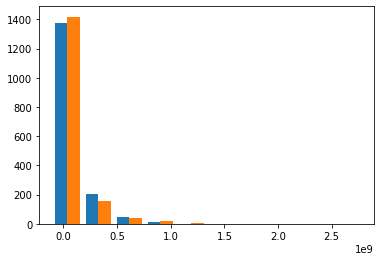

In [0]:
#verificamos con matplotlib de manera visual que los valores de la prediccion y del test se acercan
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,y_test])

In [0]:
#vamos a evaluar la presicion de nuestro modelo a través de su R2
model.score(x_test,y_test)

0.8618430757414365

In [0]:
#siempre hay que visualizar los resultados

In [0]:
#los residuales son las diferencias entre los valores reales y los predichos
residuals = y_test - predicted

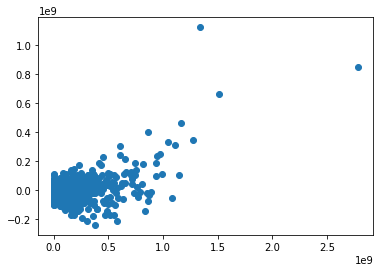

In [0]:
#graficamos los residuales para ver los errores
plt.scatter(y_test,residuals)

In [0]:
#visualizamos en forma de promedio los valores para hacernos una mejor idea de los errores
ap_residuals = np.abs(residuals) / y_test

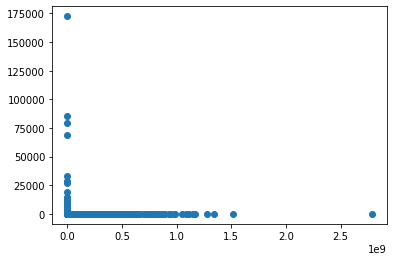

In [0]:
plt.scatter(y_test, ap_residuals)

In [0]:
#una escala logaritmica nos puede ayudar a ver de maneramas compacta el comportamiento del modelo
lap_residuals = np.log(ap_residuals)

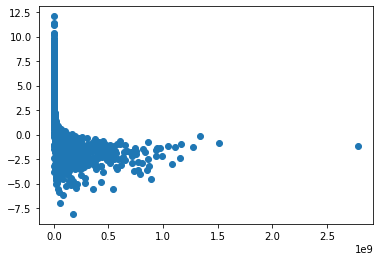

In [0]:
plt.scatter(y_test, lap_residuals)

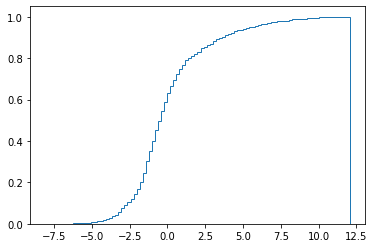

In [0]:
#de esta manera podemos notar que se confirma lo visto en el R2 aunque todavia podemos mejorar este modelo
plt.hist(lap_residuals,bins=100, density=1, histtype='step', cumulative=True);